In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', '..', '..', '..', 'models')))

# Konwersja na ruchy oczu dla wybranych punktów

In [2]:
from utils import load_data, convert_landmarks_to_eye_movements 

all_data, all_labels = load_data('silesian_deception')
all_data, blinks = convert_landmarks_to_eye_movements(all_data)

In [26]:
import torch
from torch.nn.utils.rnn import pad_sequence

tensor_data = [torch.tensor(d, dtype=torch.float32) for d in all_data]
tensor_blinks = [torch.tensor(d, dtype=torch.float32) for d in blinks]
padded_data = pad_sequence(tensor_data, batch_first=True)
padded_blinks = pad_sequence(tensor_blinks, batch_first=True)

In [5]:
x_iris_movements = padded_data[:, :, 0]
y_iris_movements = padded_data[:, :, 1]

## Average blinks per label

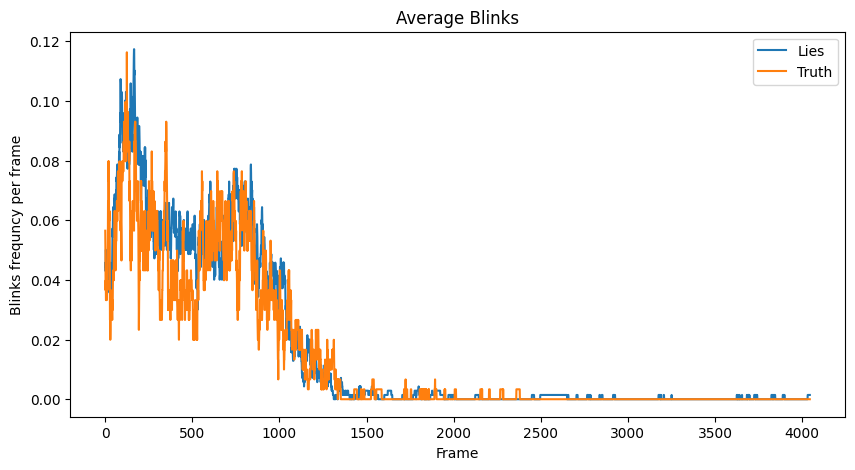

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

avg_blinks_lie = torch.mean(padded_blinks[all_labels == 1], dim=0)
avg_blinks_truth = torch.mean(padded_blinks[all_labels == 0], dim=0)
plt.plot(avg_blinks_lie, label="Lies")
plt.plot(avg_blinks_truth, label="Truth")

plt.xlabel('Frame')
plt.ylabel('Blinks frequncy per frame')
plt.title('Average Blinks')
plt.legend()
plt.show()

## Average normalized distances per label

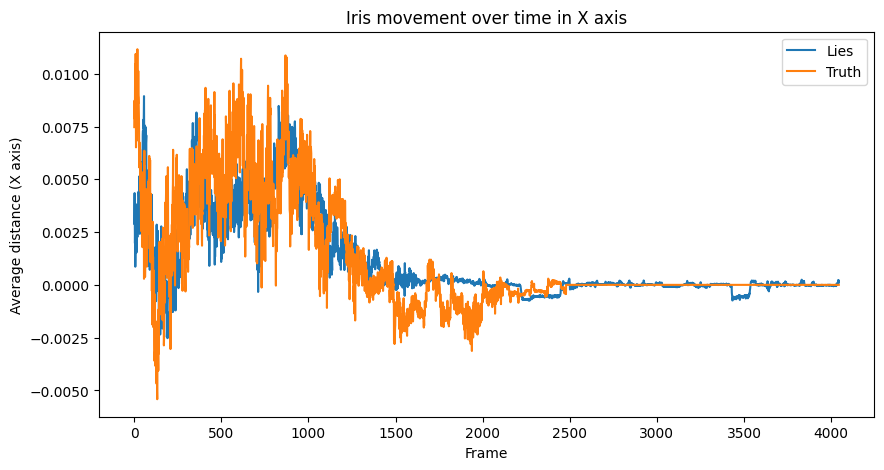

In [30]:
plt.figure(figsize=(10, 5))

avg_dist_lie = torch.mean(x_iris_movements[all_labels == 1], dim=0)
avg_dist_truth = torch.mean(x_iris_movements[all_labels == 0], dim=0)
plt.plot(avg_dist_lie, label="Lies")
plt.plot(avg_dist_truth, label="Truth")

plt.xlabel('Frame')
plt.ylabel('Average distance (X axis)')
plt.title('Iris movement over time in X axis')
plt.legend()
plt.show()

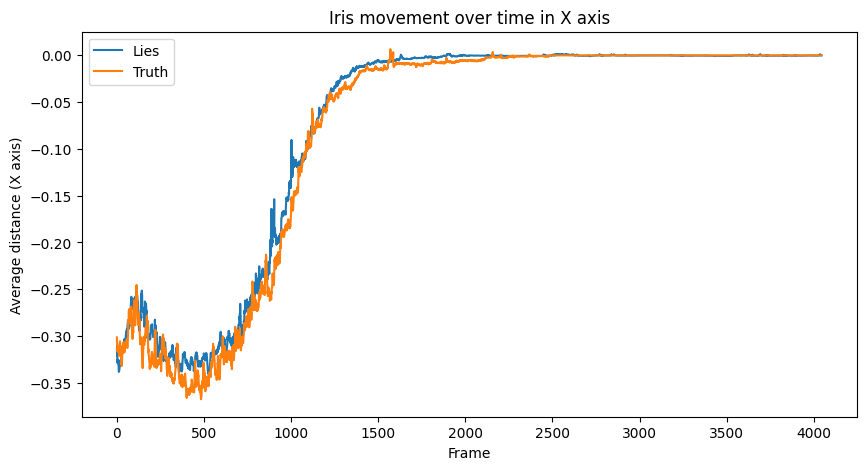

In [31]:
plt.figure(figsize=(10, 5))

avg_dist_lie = torch.mean(y_iris_movements[all_labels == 1], dim=0)
avg_dist_truth = torch.mean(y_iris_movements[all_labels == 0], dim=0)
plt.plot(avg_dist_lie, label="Lies")
plt.plot(avg_dist_truth, label="Truth")

plt.xlabel('Frame')
plt.ylabel('Average distance (X axis)')
plt.title('Iris movement over time in X axis')
plt.legend()
plt.show()

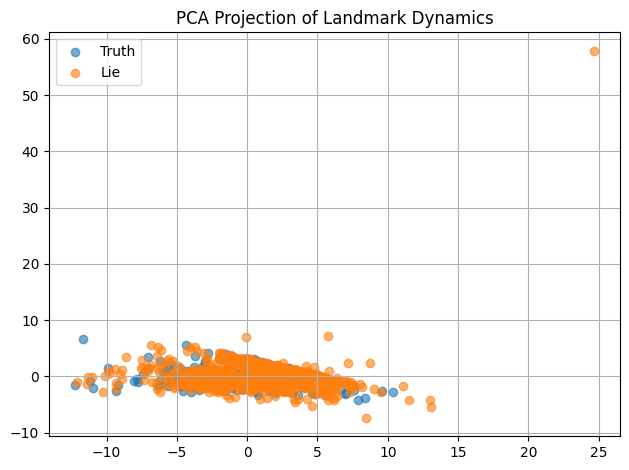

In [32]:
from sklearn.decomposition import PCA

# Flatten each sample to 609×158 = 96122 features
X_flat = padded_data.reshape(padded_data.shape[0], -1)

# PCA (or t-SNE)
X_pca = PCA(n_components=2).fit_transform(X_flat)

# Plot
plt.scatter(X_pca[all_labels == 0, 0], X_pca[all_labels == 0, 1], label='Truth', alpha=0.6)
plt.scatter(X_pca[all_labels == 1, 0], X_pca[all_labels == 1, 1], label='Lie', alpha=0.6)
plt.title('PCA Projection of Landmark Dynamics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
